#Análise Exploratória com Regressão Linear e Correlação


##1. Instalando Bibliotecas

In [1]:
#Instalando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import scipy
import matplotlib.pylab as plt


##2. Carregando o dataframe

In [2]:
df = pd.read_csv('horas_estudo.csv', sep=';')

In [ ]:
df

,horas_estudo,nota_avaliacao
0,"16,07","40,05"
1,"20,41","66,49"
2,"34,29","91,5"
3,"34,1","87,09"
4,"32,34","69,3"
...,...,...
118,"6,22","34,24"
119,"12,71","48,54"
120,"36,25","93,54"
121,"5,59","56,66"


##3. Trocando as vírgulas por ponto (.)

In [ ]:
df = df.replace(',', '.', regex=True)

In [ ]:
df.head(5)

,horas_estudo,nota_avaliacao
0,16.07,40.05
1,20.41,66.49
2,34.29,91.5
3,34.1,87.09
4,32.34,69.3


##4. Verificando formato

In [ ]:
df.dtypes

horas_estudo      object
nota_avaliacao    object
dtype: object

##5. Transformando o formato para float

In [ ]:
df = df.astype(float)
df.head()

,horas_estudo,nota_avaliacao
0,16.07,40.05
1,20.41,66.49
2,34.29,91.50
3,34.10,87.09
4,32.34,69.30


In [ ]:
df.dtypes

horas_estudo      float64
nota_avaliacao    float64
dtype: object


##6. Avaliando dados nulos

In [ ]:
#True para presença de dados nulos e false ausencia de dados nulos
missing_data = df.isnull()
missing_data.head(5)

,horas_estudo,nota_avaliacao
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


##6.1 Conte os valores ausentes em cada coluna

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

horas_estudo
horas_estudo
False    123
Name: count, dtype: int64

nota_avaliacao
nota_avaliacao
False    123
Name: count, dtype: int64



In [ ]:
#Outra opção de verificar dados nulos
df.isnull().sum()

horas_estudo      0
nota_avaliacao    0
dtype: int64

##7. Verificar dados duplicados

In [ ]:
#Verificanto duplicados
# Verificando total de valores duplicados na coluna horas_estudo
duplicados_horas_estudo = df['horas_estudo'].duplicated()
contagem_duplicatas_horas_estudo = duplicados_horas_estudo.sum(axis=0)
print(contagem_duplicatas_horas_estudo)

23


In [ ]:
# Verificando total de valores duplicados na coluna nota_avaliacao
duplicados_nota_avaliacao = df['nota_avaliacao'].duplicated()
contagem_duplicatas_nota_avaliacao = duplicados_nota_avaliacao.sum(axis=0)
print(contagem_duplicatas_nota_avaliacao)

23


##8. Eliminando dados Duplicados

In [ ]:
# Eliminando colunas duplicadas
df_sem_duplicados = df.drop_duplicates()

In [ ]:
df_sem_duplicados

,horas_estudo,nota_avaliacao
0,16.07,40.05
1,20.41,66.49
2,34.29,91.50
3,34.10,87.09
4,32.34,69.30
...,...,...
95,6.08,92.89
96,1.58,51.01
97,8.39,32.46
98,19.93,52.92


##9. Contando as linhas antes e depois de eliminar duplicados

In [ ]:
# Contagem de linhas antes de elimitar os duplicados
print(df.shape[0])
# Contagem de linhas após elimitar os duplicados
print(df_sem_duplicados.shape[0])

123
100


## 10. Verificação de Correlação entre as variáveis

Criando as variáveis dependentes e independentes

In [ ]:
# Selecionando minha variável independente (fetures)
# coletando os valores da minha primeira coluna[0]  e convertendo para formato array
X_horas_estudo =  df_sem_duplicados.iloc[:,0].values
X_horas_estudo

array([16.07, 20.41, 34.29, 34.1 , 32.34,  7.3 ,  3.37, 17.74, 33.36,
       17.78, 15.79, 13.48, 25.78, 16.03, 31.69, 30.72, 13.9 , 17.85,
       35.18,  3.95,  9.03, 22.69, 19.7 , 18.06, 14.58, 18.12, 13.58,
       31.22, 21.88, 17.35, 10.3 , 37.13, 24.21, 11.53, 10.63,  9.75,
       31.34,  0.38,  0.41, 18.31, 39.08, 28.86, 15.99, 12.62,  5.27,
       29.05, 33.92, 15.55, 37.56,  6.22, 12.71, 36.25,  5.59, 34.18,
       37.7 , 16.22, 14.14, 27.02, 22.79, 29.71, 27.79, 27.17, 11.88,
       21.27, 24.66, 19.43, 37.76, 38.47, 24.08, 26.57, 28.53, 21.28,
       15.83,  1.01, 16.25, 33.25, 16.3 , 30.74, 34.9 , 34.09, 29.94,
       26.46, 10.24, 38.91, 10.61,  5.66,  4.  , 18.91, 39.16, 25.79,
       29.35, 15.25, 26.14,  5.06, 20.32,  6.08,  1.58,  8.39, 19.93,
       21.8 ])

In [ ]:
# Criando um array da variável dependente (predict)
y_nota_avaliacao = df_sem_duplicados.iloc[:,1].values
y_nota_avaliacao

array([ 40.05,  66.49,  91.5 ,  87.09,  69.3 ,  90.59,  32.18,  55.02,
        75.06,  42.14,  41.35,  55.78,  55.81,  37.61,  59.02,  30.14,
        32.66,  47.77,  84.16,  30.93,  55.38,  32.53,  40.73,  62.32,
        55.21,  50.97,  60.25,  38.83,  75.56,  56.62,  42.21,  93.04,
        52.53,  61.2 ,  44.54,  52.48,  75.16,  10.3 ,  15.52,  44.72,
       100.  ,  80.07,  50.49,  54.03,  64.15,  62.44,  90.91,  86.84,
        94.71,  34.24,  48.54,  93.54,  56.66,  90.9 ,  79.19,  46.18,
        46.71,  74.56,  75.93,  87.5 ,  94.12,  99.22,  56.11,  42.89,
        88.95,  87.33,  95.8 ,  94.92,  73.63,  74.64,  66.14,  51.53,
        35.42,  34.47,  69.88,  82.41,  36.87,  80.71,  96.18,  92.91,
        92.72,  79.59,  85.68,  97.39,  51.88,  37.93,  58.96,  72.65,
        99.09,  71.16,  96.76,  68.13,  51.89,  76.03,  70.66,  92.89,
        51.01,  32.46,  52.92,  65.99])

##10.1 Calculando a MAtriz de correlação


In [ ]:
# matriz de correlação
np.corrcoef(X_horas_estudo, y_nota_avaliacao)

array([[1.        , 0.65975872],
       [0.65975872, 1.        ]])

In [ ]:
correlation = df_sem_duplicados.corr()

In [ ]:
correlation

,horas_estudo,nota_avaliacao
horas_estudo,1.000000,0.659759
nota_avaliacao,0.659759,1.000000


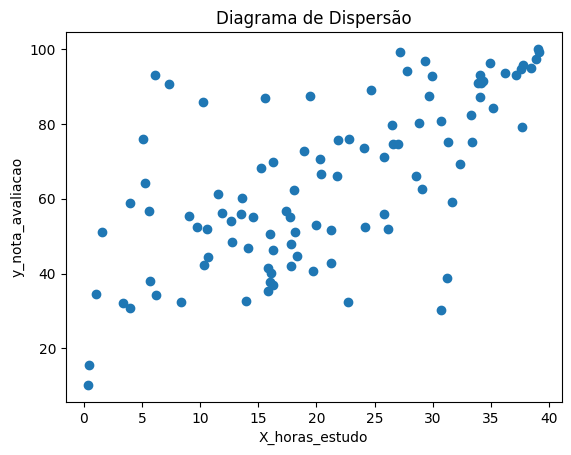

In [ ]:
plt.scatter(X_horas_estudo, y_nota_avaliacao)
plt.xlabel('X_horas_estudo')
plt.ylabel('y_nota_avaliacao')
plt.title('Diagrama de Dispersão')
plt.show()


O coeficiente de correlação de Pearson varia entre -1 e 1.

Um valor próximo a 1 indica uma forte correlação positiva (as variáveis tendem a aumentar ou diminuir juntas).

Um valor próximo a -1 indica uma forte correlação negativa (uma variável aumenta enquanto a outra diminui).

Um valor próximo a 0 indica nenhuma correlação linear entre as variáveis.

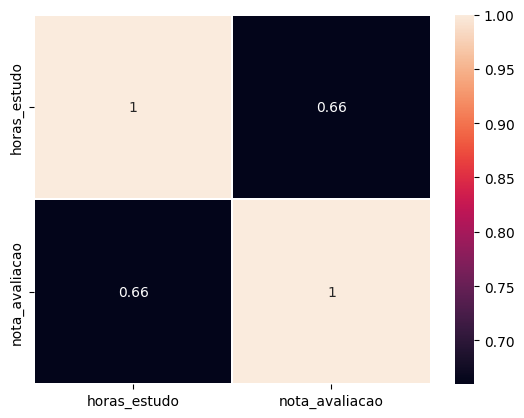

In [ ]:
plot = sns.heatmap(correlation, annot=True, linewidths=0.3)

##Importando biblioteca específica para modelagem estatística, incluindo Regressão Linear

In [ ]:
import statsmodels.api as sm

## 11. Estimação do Modelo de Regressão Linear-- sem Trein e Test

In [ ]:
# Criando o modelo de regressão linear
modelo = sm.OLS(y_nota_avaliacao, X_horas_estudo).fit()

# Resumo do modelo
print(modelo.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              739.4
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    1.01e-47
Time:                        22:03:06   Log-Likelihood:                         -456.81
No. Observations:                 100   AIC:                                      915.6
Df Residuals:                      99   BIC:                                      918.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

O resumo do modelo fornece diversas informações importantes, como:

Coeficiente de determinação (R²): Indica a porcentagem da variabilidade da variável dependente explicada pela variável independente. Um valor alto de R² (> 0,8) sugere um bom ajuste do modelo.

Erro padrão da estimativa (EPE): Mede a dispersão dos pontos de dados em relação à linha de regressão. Um valor baixo de EPE indica um modelo mais preciso.

Teste de significância (p-value): Informa a probabilidade de que o coeficiente da variável independente seja nulo (sem efeito). Um valor de p-value menor que 0,05 geralmente indica significância estatística.

Coeficiente da variável independente: Indica a mudança na variável dependente para uma unidade de mudança na variável independente.

##11.1 MOdelo de Regressão Linear com Trein e Test

> Adicionar aspas

> Adicionar aspas





Reajustando dados do dataframe, transformando em uma coluna



In [ ]:
X_horas_estudo = X_horas_estudo.reshape(-1,1)
X_horas_estudo

array([[16.07],
       [20.41],
       [34.29],
       [34.1 ],
       [32.34],
       [ 7.3 ],
       [ 3.37],
       [17.74],
       [33.36],
       [17.78],
       [15.79],
       [13.48],
       [25.78],
       [16.03],
       [31.69],
       [30.72],
       [13.9 ],
       [17.85],
       [35.18],
       [ 3.95],
       [ 9.03],
       [22.69],
       [19.7 ],
       [18.06],
       [14.58],
       [18.12],
       [13.58],
       [31.22],
       [21.88],
       [17.35],
       [10.3 ],
       [37.13],
       [24.21],
       [11.53],
       [10.63],
       [ 9.75],
       [31.34],
       [ 0.38],
       [ 0.41],
       [18.31],
       [39.08],
       [28.86],
       [15.99],
       [12.62],
       [ 5.27],
       [29.05],
       [33.92],
       [15.55],
       [37.56],
       [ 6.22],
       [12.71],
       [36.25],
       [ 5.59],
       [34.18],
       [37.7 ],
       [16.22],
       [14.14],
       [27.02],
       [22.79],
       [29.71],
       [27.79],
       [27.17],
       [

##12. Importando biblioteca e criando modelo

In [ ]:
from sklearn.linear_model import LinearRegression
# Criando um objeto do tipo regressão linear
modelo = LinearRegression()

In [ ]:
type(modelo)

sklearn.linear_model._base.LinearRegression

In [ ]:
# Importando Biblioteca
from sklearn.model_selection import train_test_split

##11.3 Treinando o modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_horas_estudo, y_nota_avaliacao, test_size=0.3, random_state=42)

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
modelo.intercept_

38.4389079322749

In [ ]:
modelo.coef_

array([1.32435859])

In [ ]:
previsao_notas = modelo.predict(X_test)

In [ ]:
previsao_notas

array([89.96970085, 83.7054847 , 76.22285864, 76.91152511, 45.41827773,
       62.6879138 , 64.52877225, 78.09020426, 59.35053014, 59.72135055,
       85.02984329, 52.07980146, 39.77651011, 53.70876253, 77.30883268,
       81.26866488, 60.02595302, 79.14969113, 72.5808725 , 87.61234255,
       59.92000434, 90.3007905 , 56.42369765, 59.61540186, 73.62711579,
       79.12320396, 90.19484181, 40.53139451, 61.98600374, 59.40350449])

In [ ]:
X_horas_estudo

array([[16.07],
       [20.41],
       [34.29],
       [34.1 ],
       [32.34],
       [ 7.3 ],
       [ 3.37],
       [17.74],
       [33.36],
       [17.78],
       [15.79],
       [13.48],
       [25.78],
       [16.03],
       [31.69],
       [30.72],
       [13.9 ],
       [17.85],
       [35.18],
       [ 3.95],
       [ 9.03],
       [22.69],
       [19.7 ],
       [18.06],
       [14.58],
       [18.12],
       [13.58],
       [31.22],
       [21.88],
       [17.35],
       [10.3 ],
       [37.13],
       [24.21],
       [11.53],
       [10.63],
       [ 9.75],
       [31.34],
       [ 0.38],
       [ 0.41],
       [18.31],
       [39.08],
       [28.86],
       [15.99],
       [12.62],
       [ 5.27],
       [29.05],
       [33.92],
       [15.55],
       [37.56],
       [ 6.22],
       [12.71],
       [36.25],
       [ 5.59],
       [34.18],
       [37.7 ],
       [16.22],
       [14.14],
       [27.02],
       [22.79],
       [29.71],
       [27.79],
       [27.17],
       [

##11.4 Plotando os resultados

##Importando biblioteca

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.scatter(x = X_train.ravel(), y = y_train)
grafico.show()

In [ ]:
grafico = px.scatter(x = X_train.ravel(), y = y_train)
grafico.add_scatter(x = X_test.ravel(), y = previsao_notas,  name = "Previsões")
grafico.show()

##Cálculo do R²:

A função score calcula o coeficiente de determinação (R²), que é uma medida de quão bem o modelo de regressão linear se ajusta aos dados. O R² varia entre 0 e 1, e valores mais próximos de 1 indicam um melhor ajuste do modelo.

In [ ]:
modelo.score(X_horas_estudo, y_nota_avaliacao)

0.42893313121329224

##Interpretação do R²:

Um R² alto (por exemplo, acima de 0,8) significa que o modelo explica uma grande parte da variabilidade das notas de avaliação em função das horas de estudo.
Um R² baixo (por exemplo, abaixo de 0,5) significa que o modelo explica apenas uma pequena parte da variabilidade das notas de avaliação, e pode haver outros fatores que influenciam as notas que não estão sendo considerados pelo modelo.

O coeficiente de determinação (R²) é apenas uma medida da qualidade de ajuste do modelo, e não indica necessariamente uma relação causal entre as variáveis.

##12. Regressão Linear modelo sem Trein e Test

In [ ]:
modelo2 = modelo
modelo2.fit(X_horas_estudo, y_nota_avaliacao)

LinearRegression()

In [ ]:
modelo2.intercept_

36.13518584017032

In [ ]:
modelo2.coef_

array([1.35256738])

In [ ]:
previsao_notas2 = modelo2.predict(X_horas_estudo)

In [ ]:
previsao_notas2

array([57.8709436 , 63.74108601, 82.51472121, 82.25773341, 79.87721483,
       46.0089277 , 40.6933379 , 60.12973112, 81.25683355, 60.18383381,
       57.49222473, 54.36779409, 71.00437283, 57.8168409 , 78.99804603,
       77.68605567, 54.93587239, 60.27851353, 83.71850618, 41.47782698,
       48.34886926, 66.82493963, 62.78076318, 60.56255268, 55.8556182 ,
       60.64370672, 54.50305083, 78.36233936, 65.72936006, 59.60222984,
       50.06662983, 86.35601256, 68.88084205, 51.7302877 , 50.51297706,
       49.32271777, 78.52464745, 36.64916144, 36.68973846, 60.90069452,
       88.99351895, 75.17028035, 57.76273821, 53.20458614, 43.26321592,
       75.42726815, 82.01427128, 57.16760856, 86.93761654, 44.54815493,
       53.32631721, 85.16575327, 43.69603748, 82.3659388 , 87.12697597,
       58.0738287 , 55.26048856, 72.68155638, 66.96019637, 76.31996262,
       73.72303326, 72.88444149, 52.20368628, 64.90429396, 69.48949737,
       62.41556998, 87.20813001, 88.16845285, 68.70500829, 72.07

In [ ]:
grafico = px.scatter(x = X_horas_estudo.ravel(), y = y_nota_avaliacao)
grafico.show()

In [ ]:
grafico = px.scatter(x = X_horas_estudo.ravel(), y = y_nota_avaliacao)
grafico.add_scatter(x = X_horas_estudo.ravel(), y = previsao_notas2,  name = "Previsões")
grafico.show()

In [ ]:
 # Calculando a média da coluna 'horas_estudos'
media_horas_estudos = df['horas_estudo'].mean()

print("Média de horas de estudo:", media_horas_estudos)


Média de horas de estudo: 20.594634146341463


In [ ]:
df_sem_duplicados.describe()

,horas_estudo,nota_avaliacao
count,100.000000,100.000000
mean,20.766000,64.222600
std,10.731428,22.000436
min,0.380000,10.300000
25%,13.287500,47.505000
50%,19.815000,62.380000
75%,29.767500,84.540000
max,39.160000,100.000000


In [ ]:
# Qual a nota prevista para o aluno que estudar 25 horas?
horas = 25
modelo2.intercept_ + modelo2.coef_ * horas

array([69.94937028])

In [ ]:
# Qual a diferença entre a nota prevista para o aluno que estou 18.06 horas e o valor real
df_filtered = df[df['horas_estudo'] == 18.06] # filtrando a nota real
df_filtered

,horas_estudo,nota_avaliacao
23,18.06,62.32


In [ ]:
# Coletando o valor previsto
horas = 18.06
modelo2.predict([[horas]])

array([60.56255268])

In [ ]:
# Subtraindo as notas real e predita
modelo2.predict([[horas]]) - df_filtered['nota_avaliacao'].iloc[0]

array([-1.75744732])

##Avaliando o modelo

##Score é um método do modelo que avalia a qualidade das previsões do modelo em um novo conjunto de dados.

##A métrica de desempenho resultante fornece uma indicação de quão bem o modelo modelo2 generaliza para novos dados e, portanto, quão confiável ele é para prever as notas de avaliação de futuros alunos.

In [ ]:
# Avaliando o modelo
modelo2.score(X_horas_estudo, y_nota_avaliacao)

0.43528156504806215

##Erro médio quadrático (MSE): Mede a diferença média entre as notas previstas pelo modelo e as notas reais. Um valor de MSE baixo indica que o modelo faz previsões precisas.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MSE = mean_squared_error(y_nota_avaliacao, previsao_notas2)
MSE

270.601202088843

##Erro absoluto médio (MAE): Mede a diferença média absoluta entre as notas previstas pelo modelo e as notas reais. Um valor de MAE baixo indica que o modelo faz previsões precisas.

In [ ]:
MAE = mean_absolute_error(y_nota_avaliacao, previsao_notas2)
MAE

12.83868977098035

##O código np.sqrt(MSE) calcula o Erro Médio Quadrático Radicular (RMSE) das previsões de um modelo. Valores menores de RMSE indicam melhor desempenho do modelo, significando uma diferença média menor entre as previsões e os valores reais.
##Uma pontuação perfeita de RMSE é 0, o que implica que as previsões do modelo correspondem perfeitamente aos valores reais.

In [ ]:
# Calculando RMSE
np.sqrt(MSE)

16.449960549765553